# Text Files From Folder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!cd /content/drive/MyDrive/FDP && ls

'Audio Folder'		   'FDP_Introduction to ML.ipynb'   Text_Files.csv
'Daily Climate Data.csv'   'Image Folder'
'Daily Climate Data.xlsx'  'Text Files'


In [6]:
# Import Libraries
import os
import string
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# Read all .txt files and store their content in a list from Folder
texts = []
file_names = []
folder_path = '/content/drive/MyDrive/FDP/Text Files'

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            print(f"\nOriginal text from {filename}:")
            print(text)
            texts.append(text)
            file_names.append(filename)


Original text from Intro.txt:
Hi, Hope you are doing well.



In [8]:
# Preprocessing - lowercase and remove punctuation
preprocessed_texts = []
for text in texts:
    text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
    print("\nText after removing punctuation:")
    print(text_no_punct)
    preprocessed_texts.append(text_no_punct)


Text after removing punctuation:
Hi Hope you are doing well



In [9]:
# Tokenization - Split into words
tokenized_texts = []
for text in preprocessed_texts:
    words = text.lower().split()
    print("\nTokenized words:")
    print(words)
    tokenized_texts.append(" ".join(words))


Tokenized words:
['hi', 'hope', 'you', 'are', 'doing', 'well']


In [10]:
# Create Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_texts)

# Show the vocabulary
print("\nVocabulary (unique words):")
print(vectorizer.get_feature_names_out())


Vocabulary (unique words):
['are' 'doing' 'hi' 'hope' 'well' 'you']


In [11]:
# matrix
print("\nBag of Words matrix:")
print(X.toarray())


Bag of Words matrix:
[[1 1 1 1 1 1]]


# Text File From CSV

In [ ]:
# Import Libraries
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Read CSV file
csv_file = '/content/drive/MyDrive/FDP/Text_Files.csv'
df = pd.read_csv(csv_file)

In [ ]:
# Extract text column
texts = df['text'].tolist()

for i, text in enumerate(texts):
    print(f"\nOriginal Text {i+1}:")
    print(text)


Original Text 1:
Hello World !

Original Text 2:
Welcome to the World of AI.


In [ ]:
# Remove punctuation
preprocessed_texts = []
for text in texts:
    text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
    print("\nText after removing punctuation:")
    print(text_no_punct)
    preprocessed_texts.append(text_no_punct)


Text after removing punctuation:
Hello World 

Text after removing punctuation:
Welcome to the World of AI


In [ ]:
# Tokenize (split into words)
tokenized_texts = []
for text in preprocessed_texts:
    words = text.lower().split()
    print("\nTokenized words:")
    print(words)
    tokenized_texts.append(" ".join(words))


Tokenized words:
['hello', 'world']

Tokenized words:
['welcome', 'to', 'the', 'world', 'of', 'ai']


In [ ]:
# Create Bag of Words matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_texts)

# Show vocabulary
print("\nVocabulary (unique words):")
print(vectorizer.get_feature_names_out())


Vocabulary (unique words):
['ai' 'hello' 'of' 'the' 'to' 'welcome' 'world']


In [ ]:
# Show Bag of Words matrix
print("\nBag of Words matrix:")
print(X.toarray())


Bag of Words matrix:
[[0 1 0 0 0 0 1]
 [1 0 1 1 1 1 1]]


# Image Files From Folder

In [ ]:
# Import required libraries
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define folder path containing images
folder_path = '/content/drive/MyDrive/FDP/Image Folder'

# Get list of image files (.jpg or .png or .jpeg)
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg') or f.endswith('.png')]
print(image_files)

['dog.jpeg']



Reading image: dog.jpeg
Original size: (183, 275)
Original mode: RGB


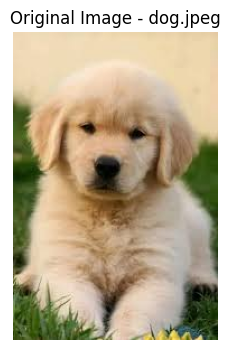

Converted to grayscale.
Image matrix (pixel values):
[[218 218 218 ... 205 204 204]
 [218 218 218 ... 205 205 204]
 [218 218 218 ... 207 206 205]
 ...
 [ 54  67  59 ...  61  48  44]
 [ 55  67  58 ...  67  52  45]
 [ 56  67  57 ...  75  57  46]]


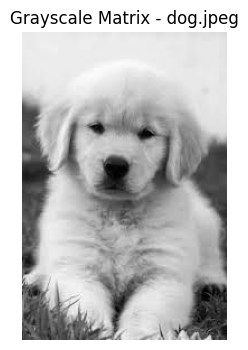

In [ ]:
# Loop through each image file
for filename in image_files:
    file_path = os.path.join(folder_path, filename)

    # Read the image using PIL
    img = Image.open(file_path)
    print(f"\nReading image: {filename}")
    print(f"Original size: {img.size}")
    print(f"Original mode: {img.mode}")

    # Plot the original image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Original Image - {filename}")
    plt.axis('off')
    plt.show()

    # Convert to grayscale
    gray_img = img.convert('L')
    print("Converted to grayscale.")

    # Convert to matrix (NumPy array)
    img_matrix = np.array(gray_img)
    print("Image matrix (pixel values):")
    print(img_matrix)

    # Plot grayscale matrix as image
    plt.figure(figsize=(4, 4))
    plt.imshow(img_matrix, cmap='gray')
    plt.title(f"Grayscale Matrix - {filename}")
    plt.axis('off')
    plt.show()

# Audio Files From Folder

In [ ]:
# Import required libraries
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [ ]:
# Define folder path
folder_path = '/content/drive/MyDrive/FDP/Audio Folder'

# List all audio files
audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav') or f.endswith('.mp3')]
print("Audio files found:", audio_files)

Audio files found: ['sample.wav']


In [ ]:
#  Load the first audio file
file_path = os.path.join(folder_path, audio_files[0])
y, sr = librosa.load(file_path, sr=16000, mono=True)

print("\nLoaded:", audio_files[0])
print("Sample rate:", sr)
print("Duration (seconds):", len(y)/sr)


Loaded: sample.wav
Sample rate: 16000
Duration (seconds): 9.6550625


In [ ]:
# Play the audio
display(Audio(y, rate=sr))

In [ ]:
# Preprocessing - Normalize the audio
y = y / np.max(np.abs(y))

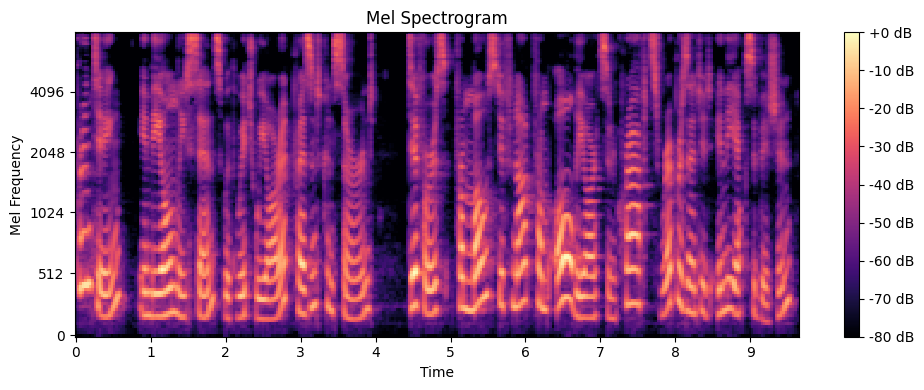

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.tight_layout()
plt.show()

# Numeric Files From CSV

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the CSV file
file_path = '/content/drive/MyDrive/FDP/Daily Climate Data.csv'
df = pd.read_csv(file_path)
df.head(5)

date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

In [ ]:
df.iloc[0]

date            2017-01-01
meantemp         15.913043
humidity         85.869565
wind_speed        2.743478
meanpressure          59.0
Name: 0, dtype: object

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
print("\nNumeric columns only:")
print(numeric_df)


Numeric columns only:
    meantemp   humidity  wind_speed  meanpressure
0  15.913043  85.869565    2.743478     59.000000
1  18.500000  77.222222    2.894444   1018.277778
2  17.111111  81.888889    4.016667   1018.333333
3  18.700000  70.050000    4.545000   1015.700000
4  18.388889  74.944444    3.300000   1014.333333
5  19.318182  79.318182    8.681818   1011.772727
6  14.708333  95.833333   10.041667   1011.375000
7  15.684211  83.526316    1.950000   1015.550000
8  14.571429  80.809524    6.542857   1015.952381
9  12.111111  71.944444    9.361111   1016.888889


In [ ]:
# Convert to matrix
matrix = numeric_df.to_numpy()
print("\nMatrix:")
print(matrix)


Matrix:
[[  15.91304348   85.86956522    2.74347826   59.        ]
 [  18.5          77.22222222    2.89444444 1018.27777778]
 [  17.11111111   81.88888889    4.01666667 1018.33333333]
 [  18.7          70.05          4.545      1015.7       ]
 [  18.38888889   74.94444444    3.3        1014.33333333]
 [  19.31818182   79.31818182    8.68181818 1011.77272727]
 [  14.70833333   95.83333333   10.04166667 1011.375     ]
 [  15.68421053   83.52631579    1.95       1015.55      ]
 [  14.57142857   80.80952381    6.54285714 1015.95238095]
 [  12.11111111   71.94444444    9.36111111 1016.88888889]]


In [ ]:
# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(matrix)
print("\nScaled Matrix:")
print(scaled_matrix)


Scaled Matrix:
[[-0.26840456  0.81080108 -0.93264632 -2.9999089 ]
 [ 0.91329356 -0.41304779 -0.87979868  0.3435146 ]
 [ 0.2788618   0.24742037 -0.48695046  0.34370824]
 [ 1.00465174 -1.42812446 -0.30200063  0.33453013]
 [ 0.86253902 -0.73541916 -0.73782878  0.32976682]
 [ 1.28703155 -0.11640895  1.14614538  0.3208422 ]
 [-0.81870516  2.22096214  1.6221777   0.31945597]
 [-0.37293337  0.47916358 -1.21041351  0.33400733]
 [-0.88124201  0.09465903  0.39737476  0.33540977]
 [-2.00509256 -1.16000583  1.38394054  0.33867383]]


# Numeric Files From Excel

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the CSV file
file_path = '/content/drive/MyDrive/FDP/Daily Climate Data.xlsx'
df = pd.read_excel(file_path)
df.tail(5)

date   meantemp   humidity  wind_speed  meanpressure
5  2017-01-06  19.318182  79.318182    8.681818   1011.772727
6  2017-01-07  14.708333  95.833333   10.041667   1011.375000
7  2017-01-08  15.684211  83.526316    1.950000   1015.550000
8  2017-01-09  14.571429  80.809524    6.542857   1015.952381
9  2017-01-10  12.111111  71.944444    9.361111   1016.888889

In [ ]:
df.loc[0]

date            2017-01-01
meantemp         15.913043
humidity         85.869565
wind_speed        2.743478
meanpressure          59.0
Name: 0, dtype: object

In [ ]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
matrix = numeric_df.to_numpy()
print("\nMatrix:")
print(matrix)


Matrix:
[[  15.91304348   85.86956522    2.74347826   59.        ]
 [  18.5          77.22222222    2.89444444 1018.27777778]
 [  17.11111111   81.88888889    4.01666667 1018.33333333]
 [  18.7          70.05          4.545      1015.7       ]
 [  18.38888889   74.94444444    3.3        1014.33333333]
 [  19.31818182   79.31818182    8.68181818 1011.77272727]
 [  14.70833333   95.83333333   10.04166667 1011.375     ]
 [  15.68421053   83.52631579    1.95       1015.55      ]
 [  14.57142857   80.80952381    6.54285714 1015.95238095]
 [  12.11111111   71.94444444    9.36111111 1016.88888889]]
